In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X,y = make_classification(n_samples=100,n_features=2, n_informative=1,
                         n_redundant=0,n_classes=2,n_clusters_per_class=1, random_state=41,
                         hypercube=False, class_sep=20)

In [2]:
X

array([[ 0.51123145, -0.11697552],
       [ 0.06316371, -0.73115232],
       [-0.0425064 , -0.7081059 ],
       [-3.2891569 , -2.01199214],
       [ 0.1111445 ,  1.63493163],
       [-2.53070306,  0.15599044],
       [-3.49036198,  1.07782053],
       [ 0.3976447 ,  0.80626713],
       [-0.24666899,  0.74859527],
       [-3.65803446,  0.75152794],
       [-3.47658131, -0.90114581],
       [-3.47815037, -0.1815243 ],
       [ 0.29004249, -2.98092432],
       [ 1.11761831,  1.20500136],
       [-3.52530398,  0.78302407],
       [ 0.69929128,  0.42968688],
       [ 0.17089733, -0.73229726],
       [-3.57785124, -0.83930476],
       [ 0.12965489,  0.83727062],
       [-3.46888717, -0.10255323],
       [-3.97487212,  0.65867001],
       [-3.76348686,  0.92649819],
       [-3.01519735,  0.10216193],
       [ 1.92241659,  0.46886454],
       [-2.91479578,  0.45432938],
       [ 0.9259563 ,  1.8613386 ],
       [-3.4859014 , -0.79255991],
       [-2.73978345, -1.0004391 ],
       [-4.09896768,

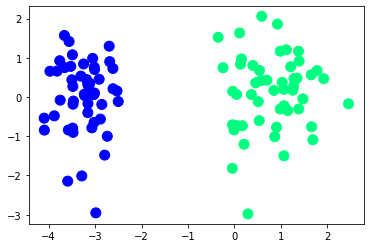

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.show()

In [4]:
def step(num):
    return 1 if num>0 else 0

def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights)) 
        weights = weights + lr * (y[j]-y_hat)* X[j]
    return weights[0], weights[1:]

In [5]:
step(np.dot(np.insert(X[0],0,1),[1,1,1]))

1

In [6]:
intercept_, coef_ = perceptron(X,y)

print(f' The intercept value is : {intercept_}')
print(f' The coefficient value are : {coef_}')

 The intercept value is : 1.3000000000000003
 The coefficient value are : [0.98628302 0.45500818]


- If an Line equation is Ax + By + C = 0 then to convert  y = mx + b

- where m = -A/B and b = -C/B

In [7]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [8]:
x_input = np.linspace(-3,3,100)

y_input = m * x_input + b

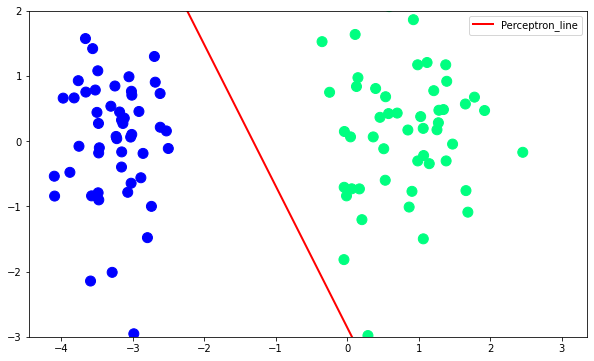

In [9]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,'r',linewidth=2,label='Perceptron_line')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()

In [10]:
def perceptron(X,y):
    
    m = []
    b = []
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights)) 
        weights = weights + lr * (y[j]-y_hat)* X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [11]:
m,b = perceptron(X,y)

In [12]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


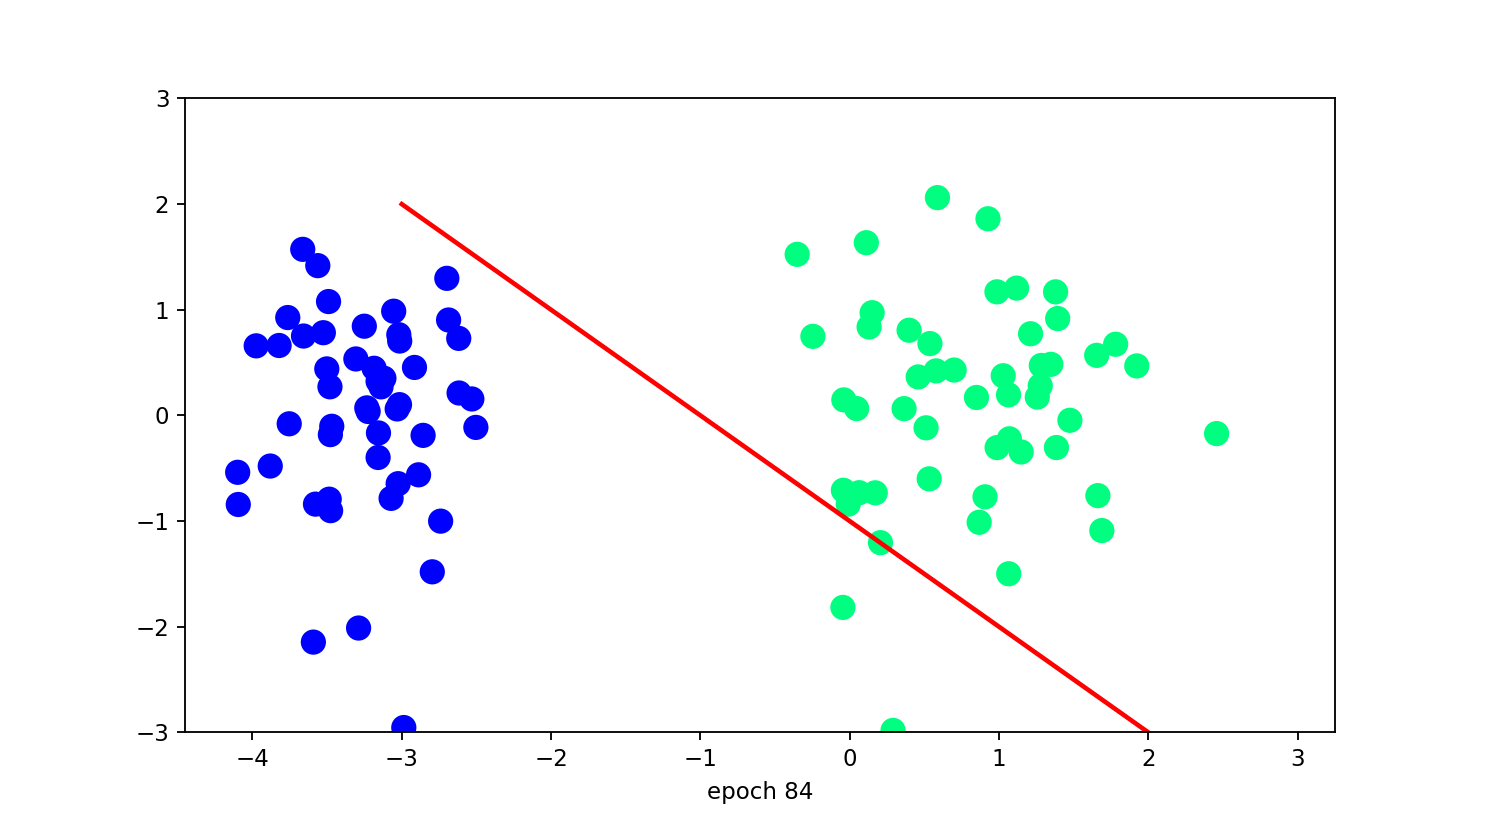

In [13]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = f'epoch {i + 1}'
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [14]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X,y)

LogisticRegression()

In [15]:
print(log.intercept_)
print(log.coef_)

[3.13649441]
[[2.36687798 0.02178765]]


In [16]:
intercept_ = log.intercept_
coef_ = log.coef_.ravel()
coef_

array([2.36687798, 0.02178765])

In [17]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [18]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

<IPython.core.display.Javascript object>


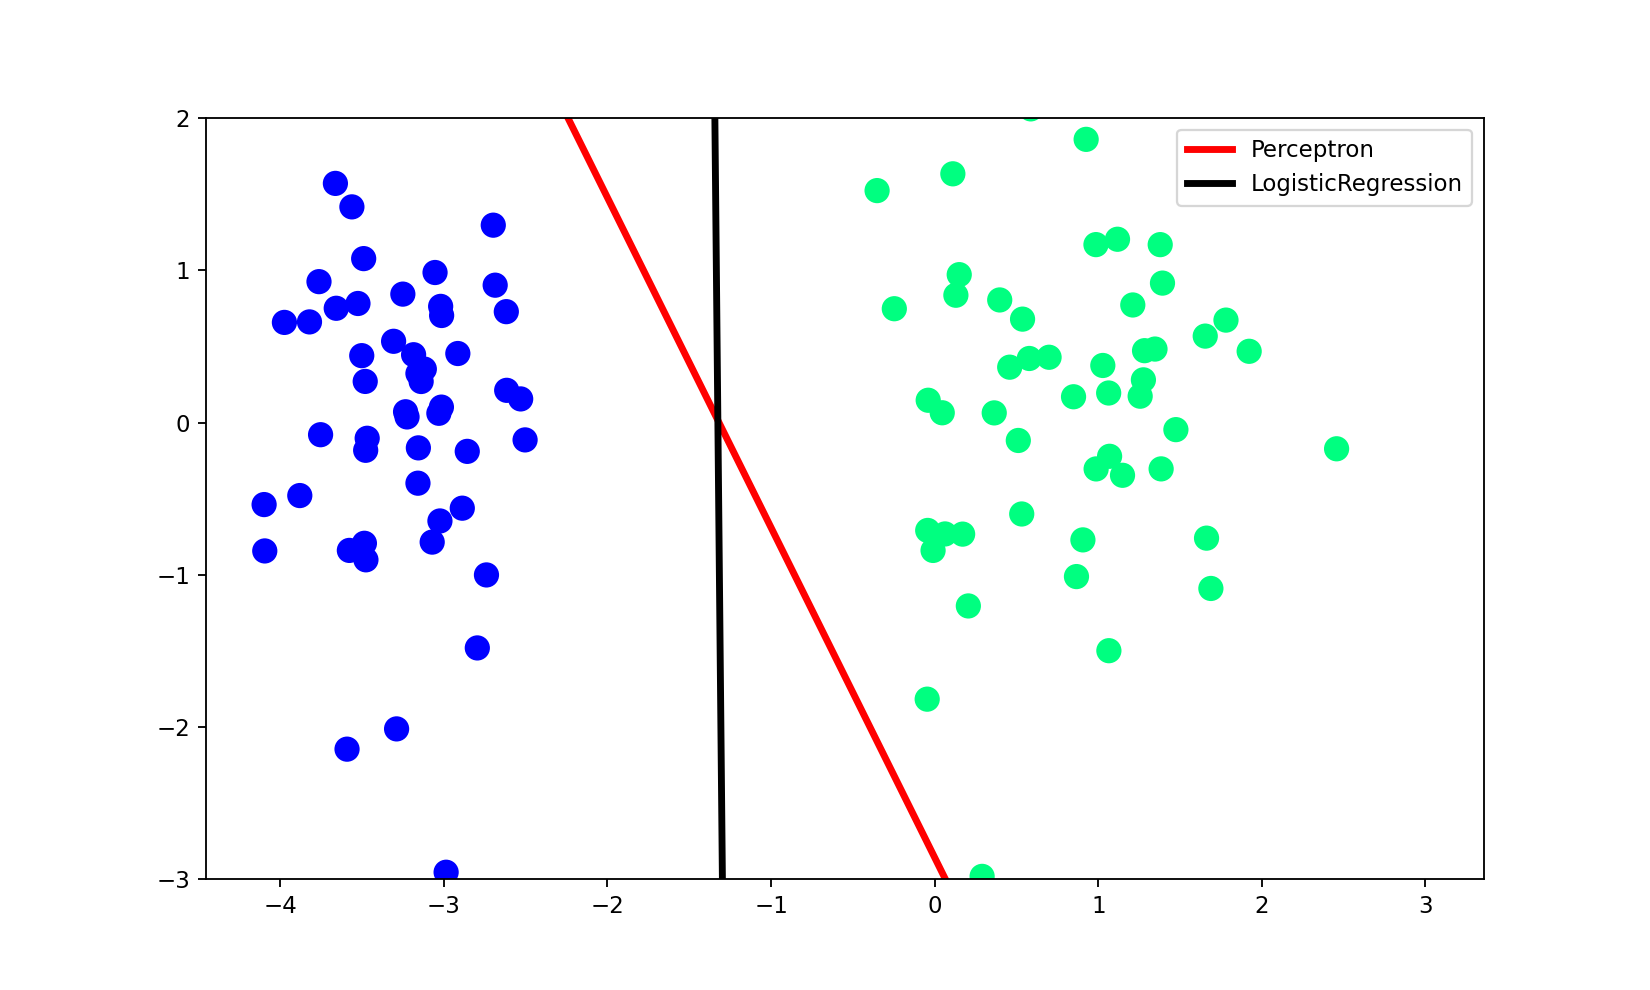

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='Perceptron')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='LogisticRegression')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()

## Disadvantage of Perceptron

- It cannot symmetrically difference between two classes


In [20]:
def sigmoid(num):
    return 1/(1+np.exp(-num))

def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights)) 
        weights = weights + lr * (y[j]-y_hat)* X[j]
    return weights[0], weights[1:]

In [21]:
intercept_, coef_ = perceptron(X,y)

In [22]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [23]:
x_input2 = np.linspace(-3,3,100)

y_input2 = m * x_input + b

<IPython.core.display.Javascript object>


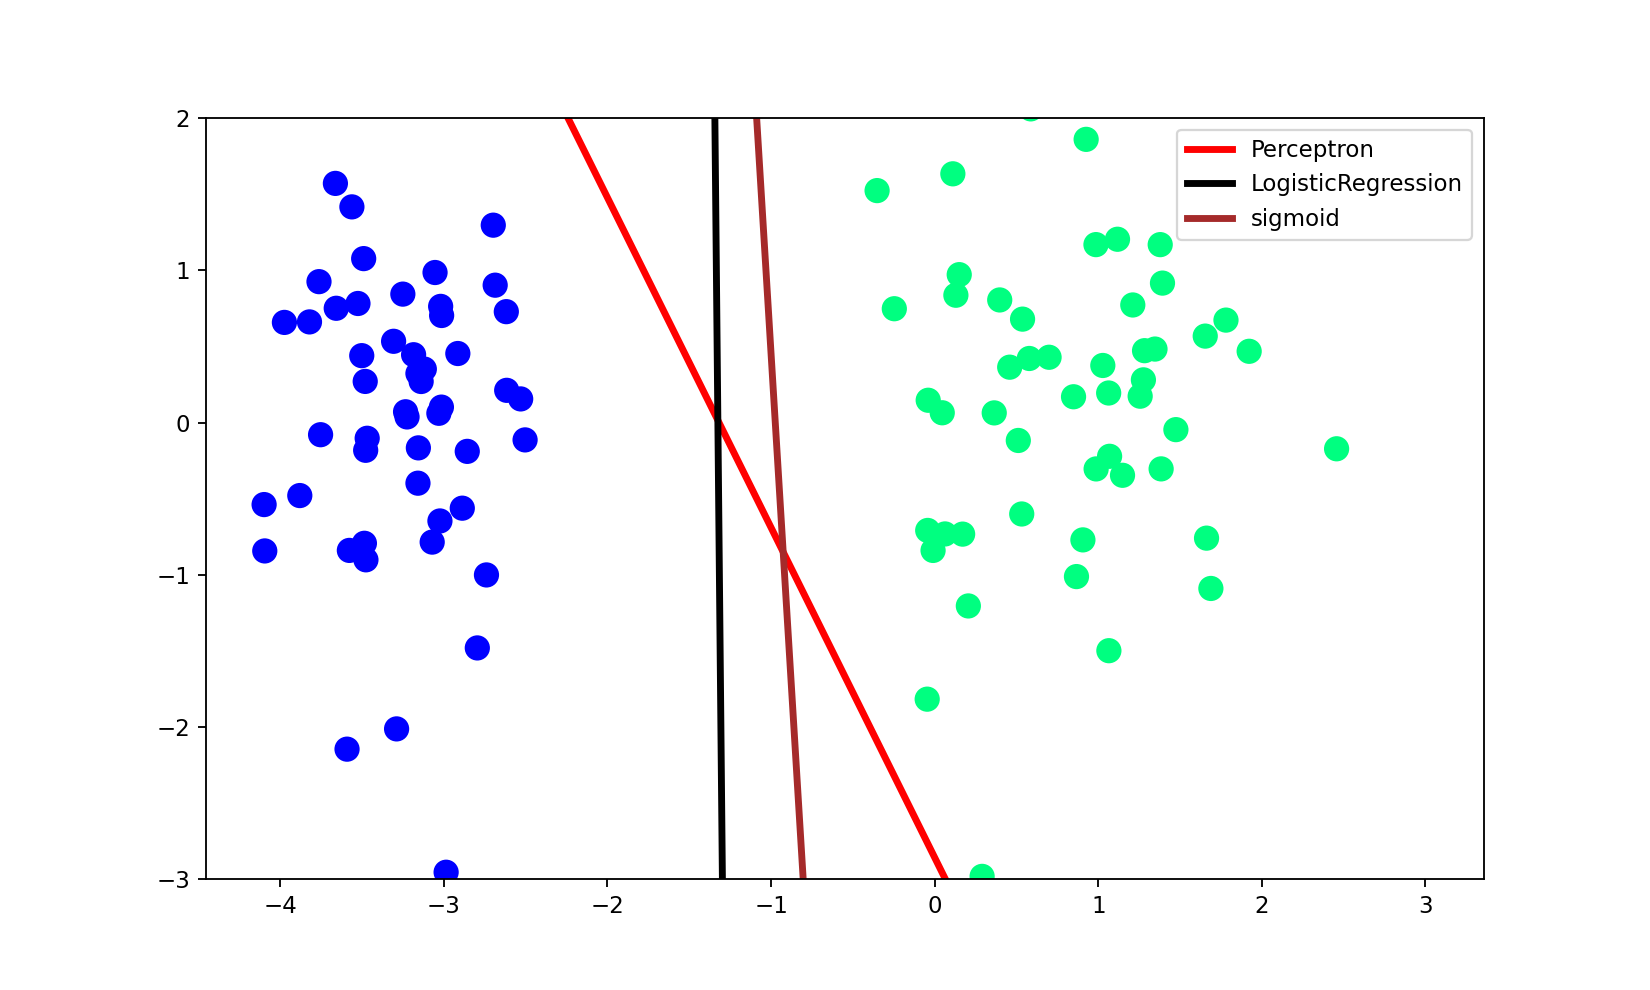

In [24]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='Perceptron')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='LogisticRegression')
plt.plot(x_input2,y_input2,color='brown',linewidth=3,label='sigmoid')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()
plt.show()